In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import speckle_stuffs as spkstf
import pickle
import scipy
import os
import pandas as pd
import seaborn as sns
sns.set()

In [3]:
rootff = ''
root_folder = rootff+'/137244019397880/'
pickles = [root_folder+ff for ff in os.listdir(root_folder) if ff.split('.')[-1]=='pickle']
pickles.sort()

In [4]:
ccmethod = 'zncc'

df = pd.DataFrame(columns=['dataset','frames_no','couplings'])

for picklesource in pickles:
    filehandler = open(picklesource, 'rb')
    [extr_traces, extr_footprints, dpars] = pickle.load(filehandler)
    filehandler.close()
    gt = rootff+picklesource.split('/')[-1].split('_')[1] + os.sep+ '_'.join((picklesource.split('/')[-1]).split('_')[:3])+'_gt.mat'                     
    grtrh_traces = spkstf.extract_traces_from_mat(gt)
    # select only the datasets with 20 traces
    if len(grtrh_traces) != 20: continue
    # cut the ground truth traces to take only the frames used for reconstruction
    grtrh_traces_cut = grtrh_traces[:,dpars['gt_frame_start']:dpars['gt_frame_start']+dpars['frames_no']]
    couplings = np.array(spkstf.find_trace_couplings(grtrh_traces_cut, extr_traces, method=ccmethod))
    
    datatemp = np.zeros(2200)
    # populate the dataframe
    for cc in couplings[:,2]:
        datatemp[dpars['frames_no']] = datatemp[dpars['frames_no']]+1
        df = df.append({
            'dataset':datatemp[dpars['frames_no']],
            'frames_no':int(dpars['frames_no']),
            'couplings':cc
        }, ignore_index=True)
        
# take a look at the traces
#     spkstf.plot_components_and_gt(extr_traces, extr_footprints, grtrh_traces_cut, couplings=couplings, show_thr=0.7)

/home/moro/git_stuffs/SpeckledFluoImagingAnalisys/speckle_stuffs.py:52: RuntimeWarning: divide by zero encountered in double_scalars
  (1./(np.std(img1)*np.std(img2)))*(img1-np.mean(img1))*(img2-np.mean(img2))
/home/moro/git_stuffs/SpeckledFluoImagingAnalisys/speckle_stuffs.py:52: RuntimeWarning: invalid value encountered in multiply
  (1./(np.std(img1)*np.std(img2)))*(img1-np.mean(img1))*(img2-np.mean(img2))
/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


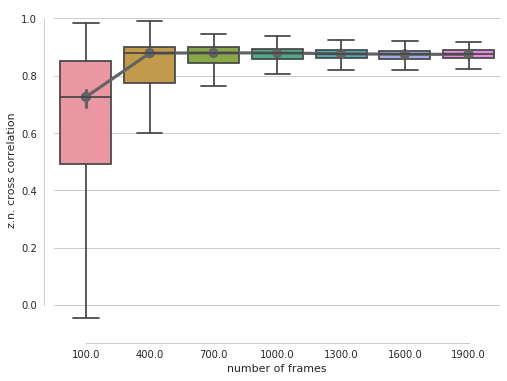

In [5]:
fig = plt.figure(figsize=(8,6))
sns.set(style="whitegrid", palette="colorblind")

tips = sns.load_dataset("tips")
ax = sns.boxplot(x="frames_no", y="couplings", data=df, showfliers=False)

sns.pointplot(x="frames_no", y="couplings",
              color='#636363',
              data=df, estimator=np.median, ax=ax)

sns.despine(offset=10, trim=True)
plt.xlabel('number of frames')
if ccmethod=='zncc':
    plt.ylabel('z.n. cross correlation')
elif ccmethod=='pcc':
    plt.ylabel('pearson cross correlation')

plt.show()